In [2]:
%load_ext rpy2.ipython

In [5]:
%%R
library('DESeq2')
# see: http://www-huber.embl.de/users/klaus/Teaching/DESeq2-Analysis.pdf

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


  warnings.warn(x, RR

In [43]:
%%R

directory<-'/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/MOPTI'
#use grep to search for the 'treated' part of filename to collect files
sampleFiles<-grep('counts',list.files(directory),value=TRUE)
print(sampleFiles)
sampleCondition<-c('untreated','untreated','untreated','untreated','untreated','untreated',
                   'treated','treated','treated','treated','treated','treated')

sampleTable<-data.frame(sampleName=sampleFiles, fileName=sampleFiles, condition=sampleCondition)

 
DESeq2Table<-DESeqDataSetFromHTSeqCount(sampleTable=sampleTable, directory=directory, design=~condition)
DESeq2Table


 [1] "Mopti-C1-AE_S179stranded_counts.out" "Mopti-C1-BM_S180stranded_counts.out"
 [3] "Mopti-C2-AE_S181stranded_counts.out" "Mopti-C2-YY_S182stranded_counts.out"
 [5] "Mopti-C3-AE_S184stranded_counts.out" "Mopti-C3-YY_S183stranded_counts.out"
 [7] "Mopti-T1-AE_S185stranded_counts.out" "Mopti-T1-BM_S186stranded_counts.out"
 [9] "Mopti-T2-BM_S187stranded_counts.out" "Mopti-T2-YY_S188stranded_counts.out"
[11] "Mopti-T3-AE_S190stranded_counts.out" "Mopti-T3-YY_S189stranded_counts.out"
class: DESeqDataSet 
dim: 14560 12 
exptData(0):
assays(1): counts
rownames(14560): ACOM024524 ACOM024536 ... ACOM033549 ACOM036007
rowData metadata column names(0):
colnames(12): Mopti-C1-AE_S179stranded_counts.out
  Mopti-C1-BM_S180stranded_counts.out ...
  Mopti-T3-AE_S190stranded_counts.out
  Mopti-T3-YY_S189stranded_counts.out
colData names(1): condition


In [44]:
%%R
GeneCounts <- counts(DESeq2Table)
idx.nz <- apply(GeneCounts, 1, function(x) { all(x > 0)})
sum(idx.nz)
#How many genes are expressed?

[1] 8816


In [45]:
%%R
### make sure to get fold change untreated-treated
con <- as.character(colData(DESeq2Table)$condition)
colData(DESeq2Table)$condition <- factor(con, levels = c("untreated", "treated"))
#### estimate size factors
DESeq2Table <- estimateSizeFactors(DESeq2Table)
sizeFactors(DESeq2Table)

Mopti-C1-AE_S179stranded_counts.out Mopti-C1-BM_S180stranded_counts.out 
                          0.7678242                           0.7047206 
Mopti-C2-AE_S181stranded_counts.out Mopti-C2-YY_S182stranded_counts.out 
                          0.5402307                           1.1791431 
Mopti-C3-AE_S184stranded_counts.out Mopti-C3-YY_S183stranded_counts.out 
                          2.1451449                           1.3654914 
Mopti-T1-AE_S185stranded_counts.out Mopti-T1-BM_S186stranded_counts.out 
                          0.9751032                           0.8063821 
Mopti-T2-BM_S187stranded_counts.out Mopti-T2-YY_S188stranded_counts.out 
                          0.7104293                           1.4293748 
Mopti-T3-AE_S190stranded_counts.out Mopti-T3-YY_S189stranded_counts.out 
                          1.3524293                           1.1015979 


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Bioconductor version 2.14 (BiocInstaller 1.14.3), ?biocLite for help

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help

  warnings.warn(x, RRuntimeWarning)


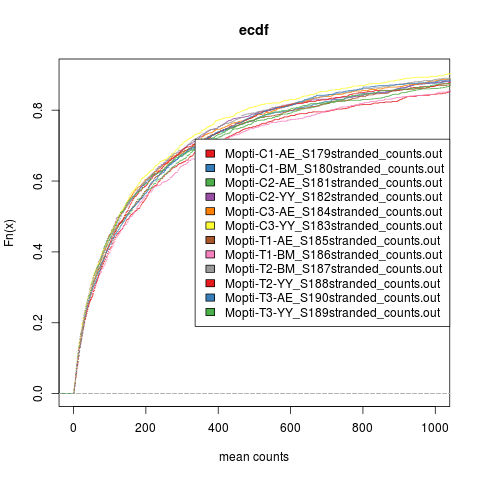

In [46]:
%%R
source("http://bioconductor.org/biocLite.R")

library("geneplotter")

multiecdf( counts(DESeq2Table, normalized = T)[idx.nz ,],xlab="mean counts", xlim=c(0, 1000))


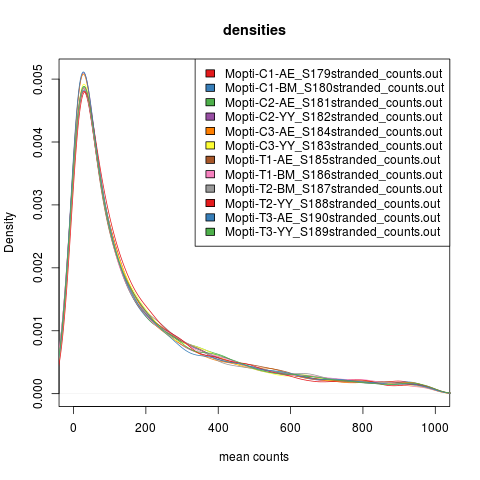

In [47]:
%%R
library("ggplot2")
multidensity( counts(DESeq2Table, normalized = T)[idx.nz ,],xlab="mean counts", xlim=c(0, 1000))

In [48]:
%%R
library(RColorBrewer)
library(gplots)
### produce rlog-transformed data
rld <- rlogTransformation(DESeq2Table, blind=TRUE)
## create a distance matrix between the samples
pdf("HeatmapPlots.pdf")
distsRL <- dist(t(assay(rld)))
mat <- as.matrix(distsRL)
hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)
heatmap.2(mat, trace="none", col = rev(hmcol), margin=c(13, 13))
dev.off()
    pdf
    2

[1] 2


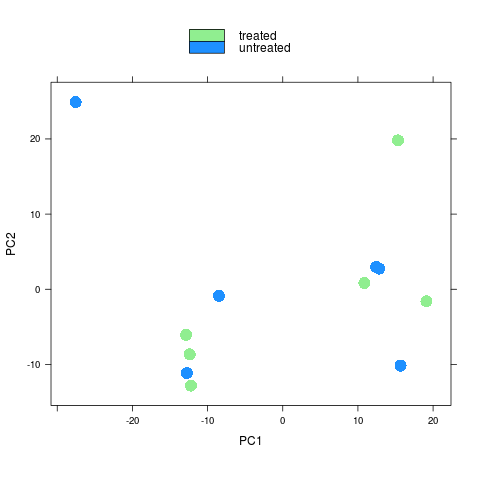

In [49]:
%%R
DESeq2::plotPCA(rld, intgroup=c("condition"))

In [22]:
# %%R
# pdf("HeatmapPlots_no_outliers.pdf")
# outliers <- c( "Mopti-C1-AE_S179stranded_counts.out", "Mopti-C1-BM_S180stranded_counts.out", "Mopti-T1-AE_S185stranded_counts.out", "Mopti-T1-BM_S186stranded_counts.out", "Mopti-C2-AE_S181stranded_counts.out", "Mopti-T2-BM_S187stranded_counts.out")
# DESeq2Table.sub <- DESeq2Table[, !(colnames(DESeq2Table) %in% outliers)]
# rld <- rlogTransformation(DESeq2Table.sub, blind=TRUE)
# distsRL <- dist(t(assay(rld)))
# mat <- as.matrix(distsRL)
# hmcol <- colorRampPalette(brewer.pal(9, "GnBu"))(100)
# heatmap.2(mat, trace="none", col = rev(hmcol), margin=c(13, 13))
# dev.off()
# pdf
# 2

[1] 2


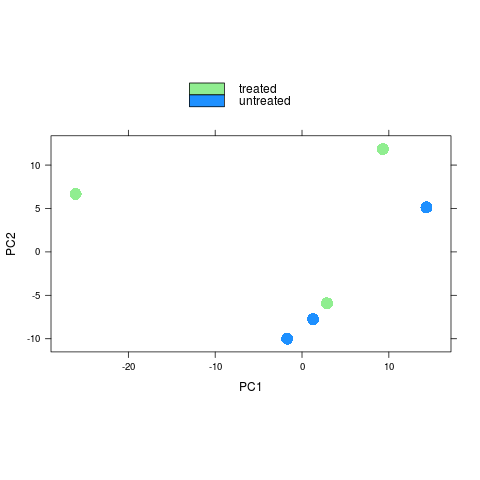

In [23]:
# %%R
# DESeq2::plotPCA(rld, intgroup=c("condition"))

In [24]:
# %%R
# ## remove outliers
# outliers <- c( "Mopti-C1-AE_S179stranded_counts.out", "Mopti-C1-BM_S180stranded_counts.out", "Mopti-T1-AE_S185stranded_counts.out", "Mopti-T1-BM_S186stranded_counts.out", "Mopti-C2-AE_S181stranded_counts.out", "Mopti-T2-BM_S187stranded_counts.out")
# DESeq2Table <- DESeq2Table[, !(colnames(DESeq2Table) %in% outliers)]

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: gene-wise dispersion estimates

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: mean-dispersion relationship

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: final dispersion estimates

  warnings.warn(x, RRuntimeWarning)


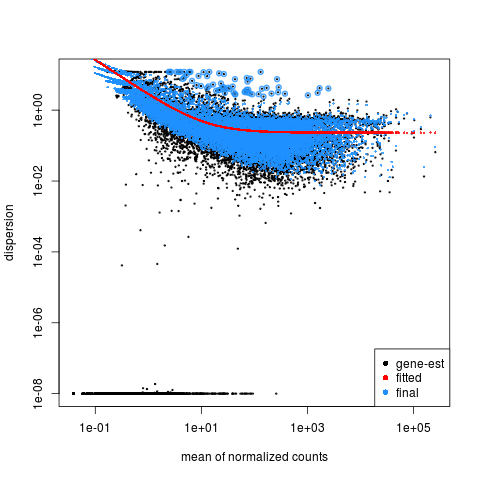

In [50]:
%%R
DESeq2Table <- estimateDispersions(DESeq2Table)
#gene-wise dispersion estimates
#mean-dispersion relationship
#final dispersion estimates
plotDispEsts(DESeq2Table)

In [51]:
%%R 
DESeq2Table <- nbinomWaldTest(DESeq2Table)
DESeq2Res <- results(DESeq2Table, pAdjustMethod = "BH")
write.table(DESeq2Res, file = "cyp1_diffexp")
sigGenes1 <- rownames(subset(DESeq2Res, padj < 0.1))
print(sigGenes1)
### number of siginificant DE-genes
table(DESeq2Res$padj < 0.1)


character(0)

FALSE 
12344 


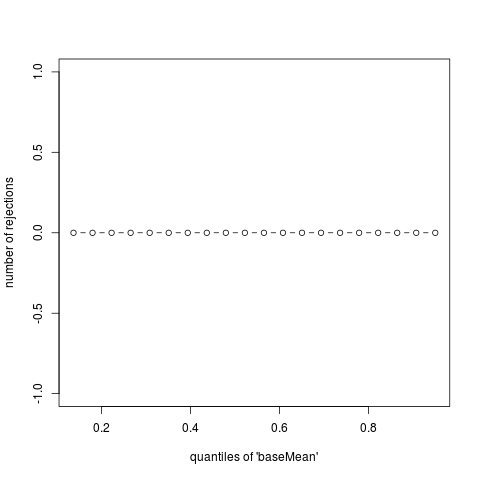

In [52]:
%%R
attr(DESeq2Res,"filterThreshold")

plot(attr(DESeq2Res,"filterNumRej"),type="b", xlab="quantiles of 'baseMean'",
ylab="number of rejections")

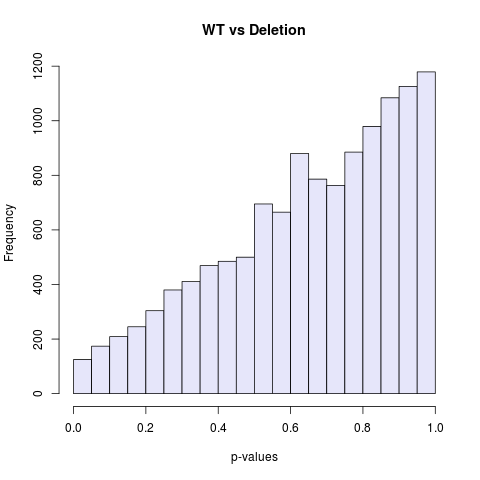

In [53]:
%%R
hist(DESeq2Res$pvalue, col = "lavender",
main = "WT vs Deletion", xlab = "p-values")

# There is a hill shape in the p-values, so I need this added correction.

In [54]:
%%R
biocLite("fdrtool")
library(fdrtool)


The downloaded source packages are in
	‘/tmp/Rtmp1uV2qO/downloaded_packages’


Step 1... determine cutoff point
Step 2... estimate parameters of null distribution and eta0
Step 3... compute p-values and estimate empirical PDF/CDF
Step 4... compute q-values and local fdr
Step 5... prepare for plotting



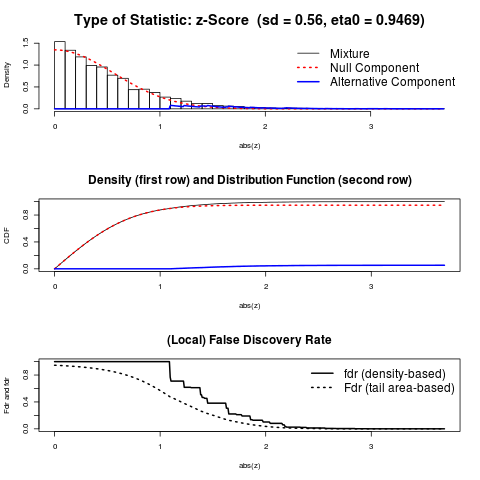

In [55]:
%%R
### remove filtered out genes by independent filtering,
### they have NA adj. pvals
DESeq2Res <- DESeq2Res[ !is.na(DESeq2Res$padj), ]
### remove genes with NA pvals (outliers)
DESeq2Res <- DESeq2Res[ !is.na(DESeq2Res$pvalue), ]
### remove adjsuted pvalues, since we add the fdrtool results later on
### (based on the correct p-values)
DESeq2Res <- DESeq2Res[, -which(names(DESeq2Res) == "padj")]
### use z-scores as input to FDRtool to re-estimate the p-value
#print(DESeq2Res)
FDR.DESeq2Res <- fdrtool(DESeq2Res$stat, statistic= "normal", plot = T)
# ### null model variance
FDR.DESeq2Res$param[1, "sd"]
# sd
# 0.817
# ### add values to the results data frame, also ad new BH- adjusted p-values
DESeq2Res[,"padj"] <- p.adjust(FDR.DESeq2Res$pval, method = "BH")

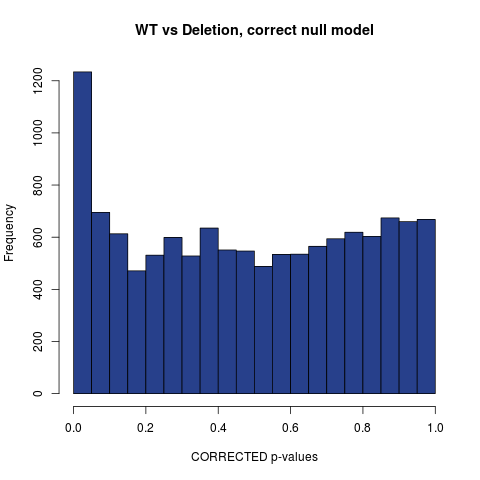

In [56]:
%%R
hist(FDR.DESeq2Res$pval, col = "royalblue4",
main = "WT vs Deletion, correct null model", xlab = "CORRECTED p-values")

In [61]:
%%R
table(DESeq2Res[,"padj"] < 0.1)


FALSE  TRUE 
12130   214 


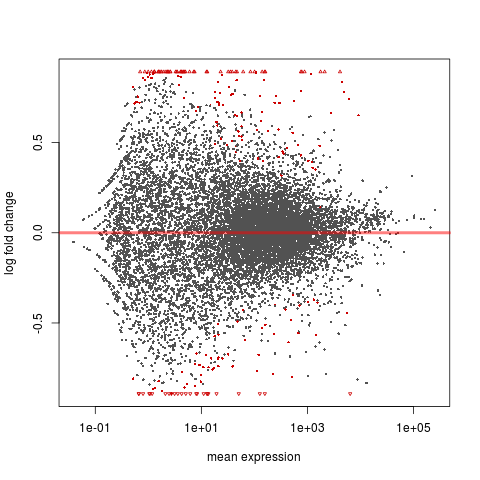

In [62]:
%%R
plotMA(DESeq2Res)

In [63]:
%%R
sigGenes <- rownames(subset(DESeq2Res, padj < 0.1))
print(sigGenes)

  [1] "ACOM024531" "ACOM024861" "ACOM024919" "ACOM024939" "ACOM024966"
  [6] "ACOM042528" "ACOM042538" "ACOM025423" "ACOM025576" "ACOM025627"
 [11] "ACOM025687" "ACOM025686" "ACOM025711" "ACOM025780" "ACOM025801"
 [16] "ACOM025799" "ACOM025939" "ACOM025992" "ACOM027769" "ACOM036733"
 [21] "ACOM036737" "ACOM036771" "ACOM036805" "ACOM036821" "ACOM036832"
 [26] "ACOM036969" "ACOM042384" "ACOM037058" "ACOM037088" "ACOM037112"
 [31] "ACOM037117" "ACOM037125" "ACOM037179" "ACOM037338" "ACOM037565"
 [36] "ACOM023570" "ACOM023635" "ACOM023744" "ACOM023782" "ACOM023781"
 [41] "ACOM023842" "ACOM034889" "ACOM028258" "ACOM028306" "ACOM028364"
 [46] "ACOM028700" "ACOM028804" "ACOM028831" "ACOM027060" "ACOM027072"
 [51] "ACOM027161" "ACOM027163" "ACOM027165" "ACOM027306" "ACOM028096"
 [56] "ACOM028113" "ACOM031924" "ACOM031997" "ACOM032014" "ACOM032005"
 [61] "ACOM032175" "ACOM032249" "ACOM033081" "ACOM033379" "ACOM027458"
 [66] "ACOM027639" "ACOM027641" "ACOM027656" "ACOM027658" "ACOM033757"
 [71] 